<a href="https://colab.research.google.com/github/Enkhzol/diveintocode-ml/blob/master/diver_class_assignment12_HomePriceForecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**[Problem 1] Feature selection for practice**

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split    
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**[Problem 1] Feature selection for practice**

After reading the dataset, extract the explanatory variables GrLivArea and YearBuilt, and the objective variable SalePrice, respectively.

In [4]:
features = ['GrLivArea', 'YearBuilt']
target = ['SalePrice']

X = data[features].values
y = data[target].values

**[Problem 2] Estimation and evaluation by linear regression**

Train:  (1095, 2)
Test:  (365, 2)
Feature:  ['GrLivArea', 'YearBuilt']
Predict:  ['SalePrice']
Correct Rate: 43.22%


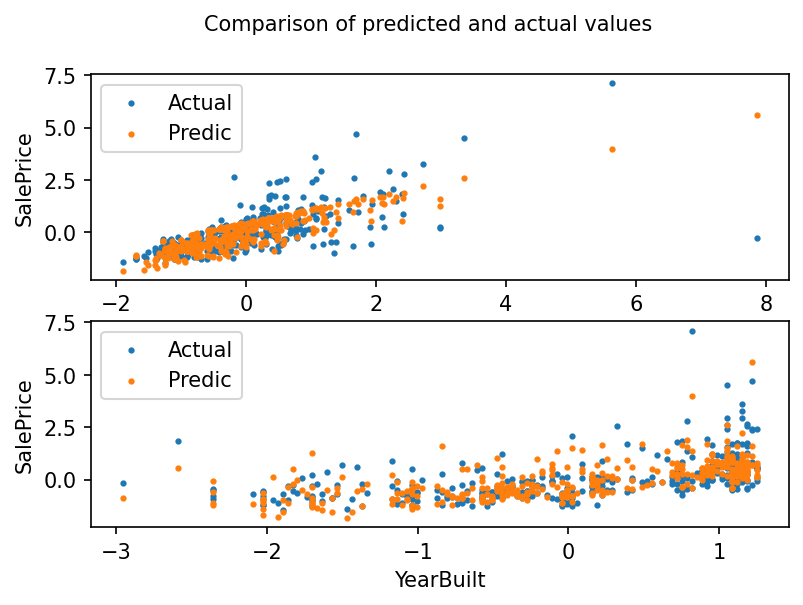

In [5]:
X_std = scale(X)
y_std = scale(y)

X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, random_state = 0)

print("Train: ",X_train.shape)
print("Test: ",X_test.shape)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
score_list = []
# Calculate Mean Square Root and Plot
def cal_and_plot_model(model, features, target):
    model.fit(X_train, y_train)

    pred_y = model.predict(X_test)

    score = mean_squared_error(y_test, pred_y)
    score_list.append(score)

    print("Feature: ", features)
    print("Predict: ", target)
    print("Correct Rate: {:.2f}%".format(score*100))

    fig = plt.figure(dpi=150)
    ax1 = fig.add_subplot(2, 1, 1)
    ax2 = fig.add_subplot(2, 1, 2)
    fig.suptitle('Comparison of predicted and actual values', fontsize=10)

    ax1.set_xlabel(features[0])
    ax1.set_ylabel(target[0])
    ax1.scatter(X_test[:, 0], y_test, label='Actual', s=4)
    ax1.scatter(X_test[:, 0], pred_y, label='Predic', s=4)
    ax1.legend()
    ax1.plot()


    ax2.set_xlabel(features[1])
    ax2.set_ylabel(target[0])
    ax2.scatter(X_test[:, 1], y_test, label='Actual', s=4)
    ax2.scatter(X_test[:, 1], pred_y, label='Predic', s=4)
    ax2.legend()
    ax2.plot


    
lr = LinearRegression()

cal_and_plot_model(lr, features, target)

**[Problem 3] Comparison of methods**

Please learn, estimate, evaluate and visualize all of the following methods. Then, please summarize the index values in one table. Use the table and the visualized figure to briefly discuss the results. Please state which method had the better index value and what the figure looked like.


* Linear regression
* SVM
* Decision tree
* Random forest

The link to the official documentation is below. Originally, we will perform parameter tuning, but let's run with the default values first.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature:  ['GrLivArea', 'YearBuilt']
Predict:  ['SalePrice']
Correct Rate: 36.29%


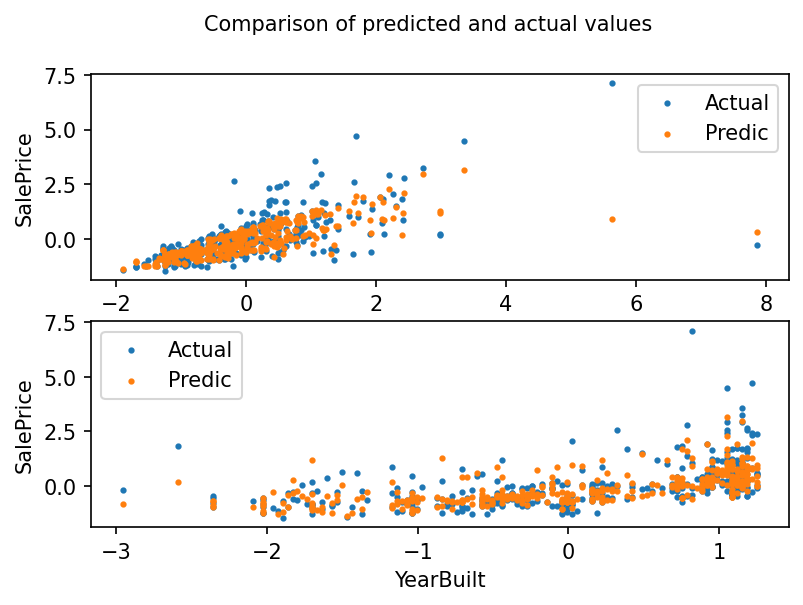

In [7]:
#SVM

from sklearn.svm import SVR

svr = SVR()

cal_and_plot_model(svr, features, target)

Feature:  ['GrLivArea', 'YearBuilt']
Predict:  ['SalePrice']
Correct Rate: 49.37%


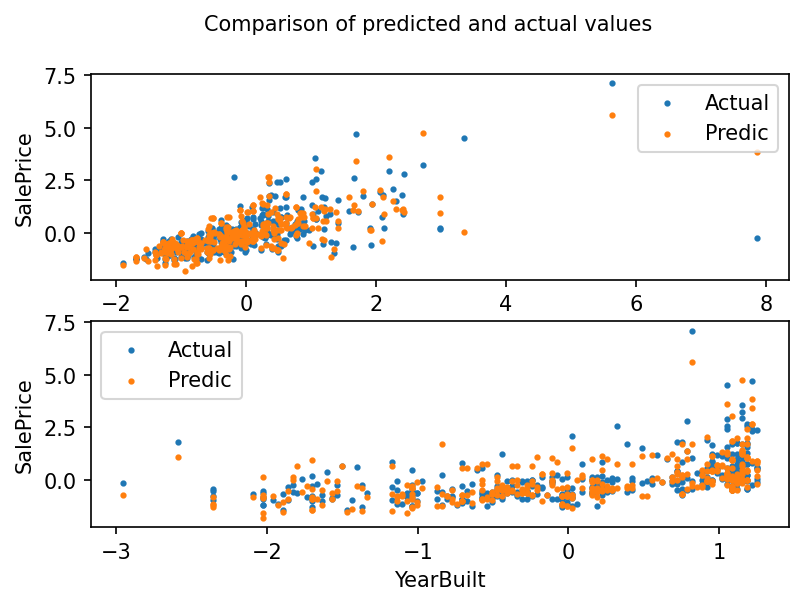

In [6]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
cal_and_plot_model(tree, features, target)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Feature:  ['GrLivArea', 'YearBuilt']
Predict:  ['SalePrice']
Correct Rate: 27.30%


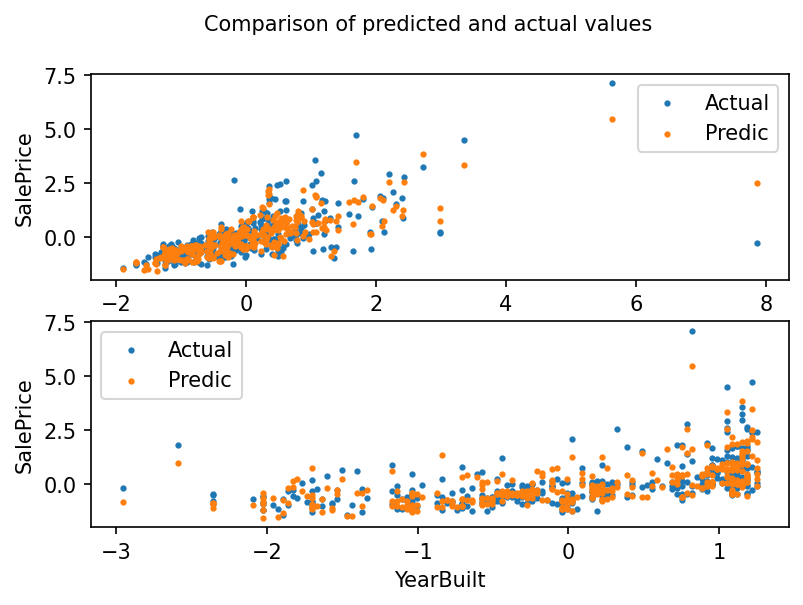

In [8]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
cal_and_plot_model(forest, features, target)

In [9]:
df_score = pd.DataFrame(score_list,
                        columns=['Correct Rate'],
                        index=['Linear Regression', 'SVM', 'Decision Tree', 'Random Forest'])
df_score

,Correct Rate
Linear Regression,0.432218
SVM,0.493680
Decision Tree,0.362905
Random Forest,0.273025


**[Problem 4] (Advance assignment) Learning using other features**

So far we have used only two features for practice, but please verify what happens when you add other features. Data analysis will be important for how to select and process them.


In [10]:
features = ['GrLivArea', 'YearBuilt', 'LotArea', 'YearRemodAdd']
target = ['SalePrice']

X = data[features].values
y = data[target].values
X_std = scale(X)
y_std = scale(y)

X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, random_state = 0)

score_list = []

def cal_and_plot_model_multiple(model, features, target):
    model.fit(X_train, y_train)
    pred_y = model.predict(X_test)
    score = mean_squared_error(y_test, pred_y)
    score_list.append(score)

    print("Feature: ", features)
    print("Predict: ", target)
    print("Correct Rate: {:.2f}%".format(score*100))

    fig = plt.figure(dpi=150)

    fig.suptitle('Comparison of predicted and correct values', fontsize=10)

    for i in range(len(features)):
        ax = plt.subplot(len(features), 1, i+1)
        ax.set_xlabel(features[i])
        ax.set_ylabel(target[0])
        ax.scatter(X_test[:, i], y_test, label='Actual',s=3)
        ax.scatter(X_test[:, i], pred_y, label='Predic',s=3)

        

Feature:  ['GrLivArea', 'YearBuilt', 'LotArea', 'YearRemodAdd']
Predict:  ['SalePrice']
Correct Rate: 42.11%


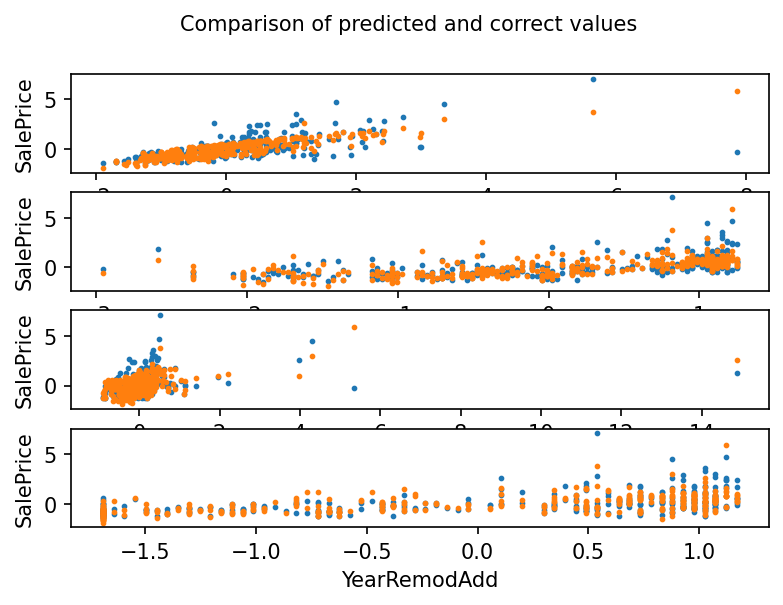

In [11]:
lr = LinearRegression()

cal_and_plot_model_multiple(lr, features, target)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature:  ['GrLivArea', 'YearBuilt', 'LotArea', 'YearRemodAdd']
Predict:  ['SalePrice']
Correct Rate: 31.36%


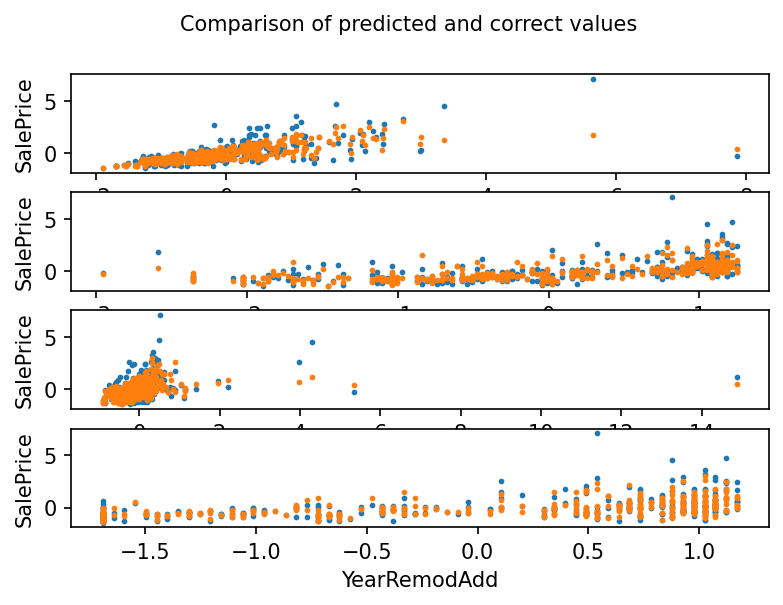

In [12]:
svr = SVR()

cal_and_plot_model_multiple(svr, features, target)

Feature:  ['GrLivArea', 'YearBuilt', 'LotArea', 'YearRemodAdd']
Predict:  ['SalePrice']
Correct Rate: 46.24%


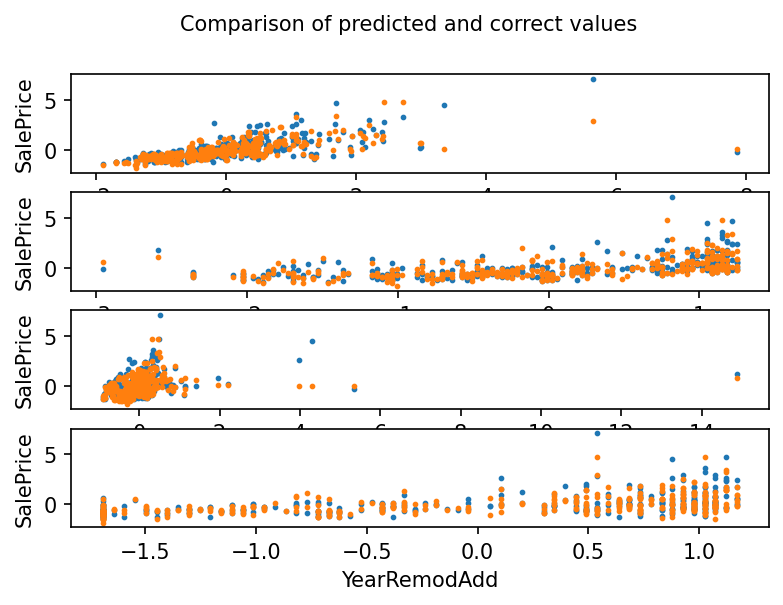

In [13]:
tree = DecisionTreeRegressor()

cal_and_plot_model_multiple(tree, features, target)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Feature:  ['GrLivArea', 'YearBuilt', 'LotArea', 'YearRemodAdd']
Predict:  ['SalePrice']
Correct Rate: 23.58%


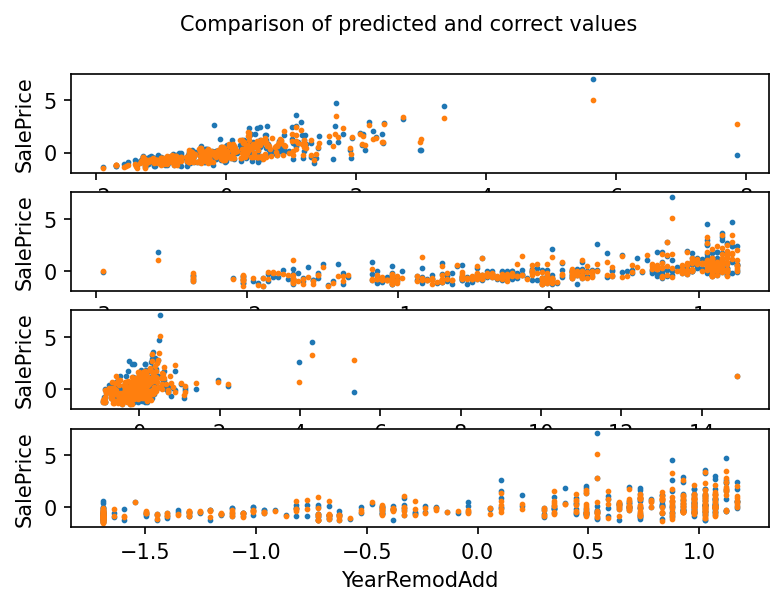

In [14]:
forest = RandomForestRegressor()

cal_and_plot_model_multiple(forest, features, target)

In [15]:
df_score = pd.DataFrame(score_list,
                        columns=['Correct Rate'],
                        index=['Linear Regression', 'SVM', 'Decision Tree', 'Random Forest'])
df_score

,Correct Rate
Linear Regression,0.421066
SVM,0.313565
Decision Tree,0.462363
Random Forest,0.235849
